In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the dataset


In [4]:
df=pd.read_csv("/content/compressed_data.csv")
df


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

data *cleaning ( handling the missing values)

In [6]:
df.isna().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
df["last review"]=pd.to_datetime(df["last review"],errors='coerce') # coerce is used to avoid detection of null value
df["last review"]

,last review
0,2021-10-19
1,2022-05-21
2,NaT
3,2019-07-05
4,2018-11-19
...,...
102594,NaT
102595,2015-07-06
102596,NaT
102597,2015-10-11


In [9]:
df.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [10]:
df.fillna({"reviews per month" :0,"last review" :df["last review"].min()},inplace=True)
df['last review']

,last review
0,2021-10-19
1,2022-05-21
2,2012-07-11
3,2019-07-05
4,2018-11-19
...,...
102594,2012-07-11
102595,2015-07-06
102596,2012-07-11
102597,2015-10-11


In [11]:
df["reviews per month"]

,reviews per month
0,0.21
1,0.38
2,0.00
3,4.64
4,0.10
...,...
102594,0.00
102595,0.02
102596,0.00
102597,0.10


In [12]:
df.dropna(subset={"NAME","host name"},inplace=True)


In [13]:
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,276
host name,0
neighbourhood group,26
neighbourhood,16
lat,8
long,8
country,526


In [14]:
df=df.drop(columns=["license","house_rules"],errors='ignore')
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,$844,$169,1.0,0.0,2012-07-11,0.00,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,$988,$198,3.0,0.0,2012-07-11,0.00,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0


In [15]:
for i in df[['price','service fee',]]:
    df[i] = df[i].str.replace('$','')
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966,193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142,28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620,124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204,41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577,115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,844,169,1.0,0.0,2012-07-11,0.00,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,837,167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,988,198,3.0,0.0,2012-07-11,0.00,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,546,109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0


In [16]:
df.isnull().sum()

,0
id,0
NAME,0
host id,0
host_identity_verified,276
host name,0
neighbourhood group,26
neighbourhood,16
lat,8
long,8
country,526


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101949 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101949 non-null  int64         
 1   NAME                            101949 non-null  object        
 2   host id                         101949 non-null  int64         
 3   host_identity_verified          101673 non-null  object        
 4   host name                       101949 non-null  object        
 5   neighbourhood group             101923 non-null  object        
 6   neighbourhood                   101933 non-null  object        
 7   lat                             101941 non-null  float64       
 8   long                            101941 non-null  float64       
 9   country                         101423 non-null  object        
 10  country code                    101827 non-null  object      

remove duplicate

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


Visualization


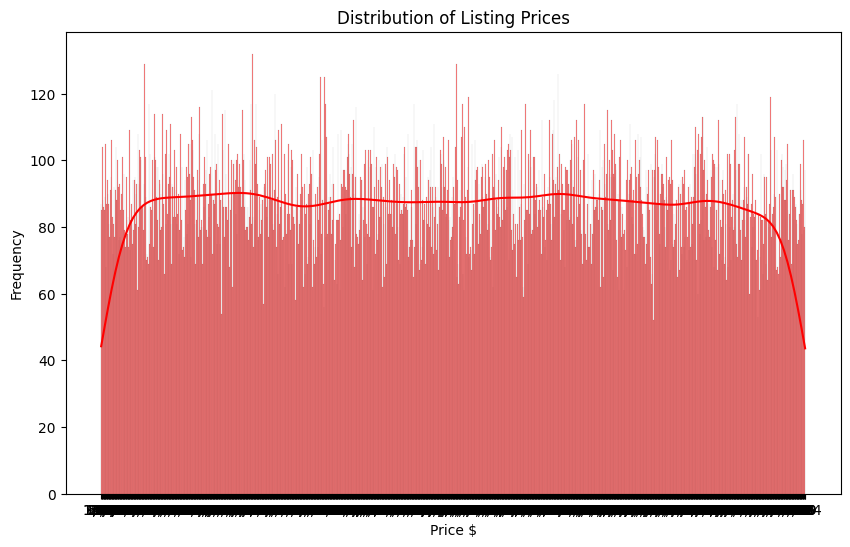

In [23]:
# what is the distribution of listing prices?
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=50,kde=True,color="Red")
plt.title("Distribution of Listing Prices")
plt.xlabel("Price $")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# HOW ARE THE DIFFERENT ROOM TYPE DISTRIBUTED

In [24]:
df["room type"]

,room type
0,Private room
1,Entire home/apt
2,Private room
4,Entire home/apt
5,Entire home/apt
...,...
102053,Private room
102054,Private room
102055,Entire home/apt
102056,Private room


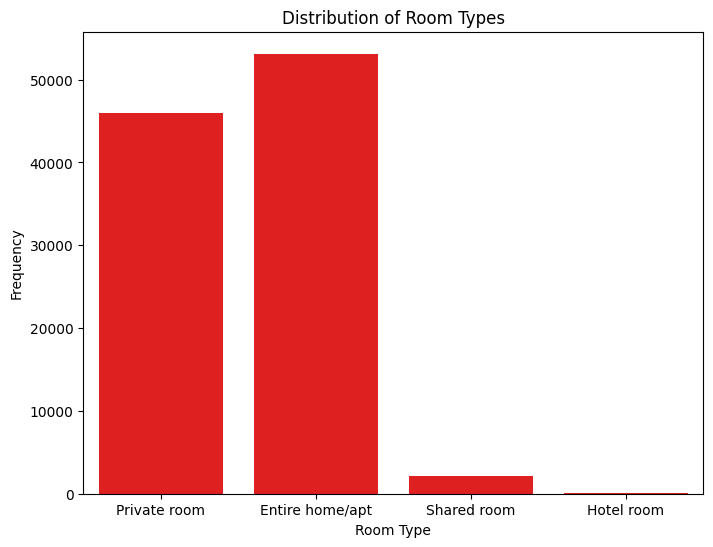

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x="room type",data=df,color="Red")
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Neighborhood Group')

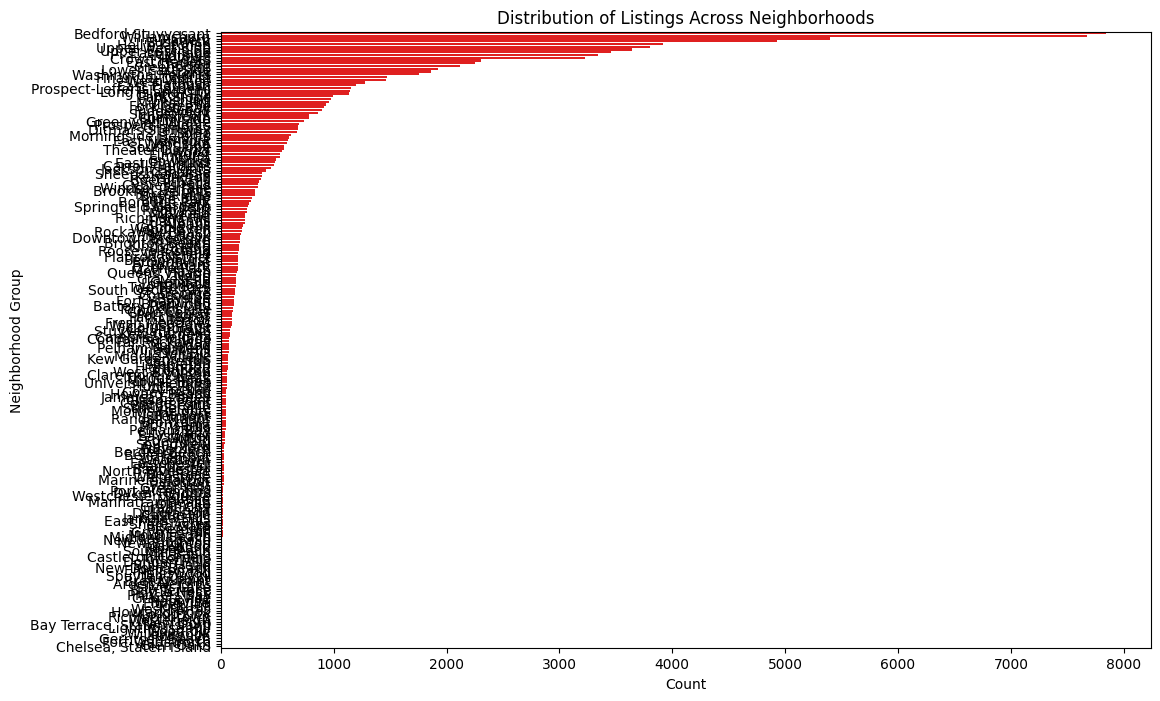

In [29]:
# HOW ARE LISTING DISTRIBUTED ACROSS DIFFERENT NEIGHBORHOODS
plt.figure(figsize=(12,8))
sns.countplot(y="neighbourhood",data=df,color="Red",order=df["neighbourhood"].value_counts().index)
plt.title("Distribution of Listings Across Neighborhoods")
plt.xlabel("Count")
plt.ylabel("Neighborhood Group")

Text(0, 0.5, 'Frequency')

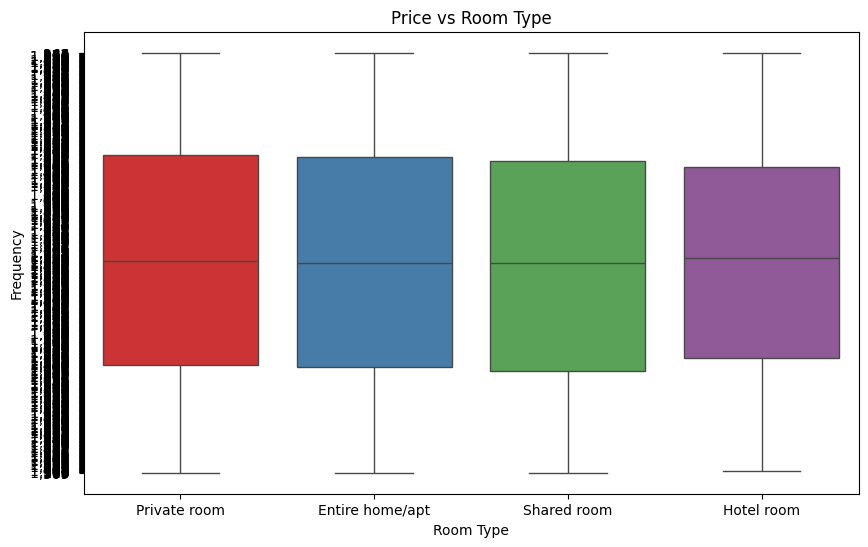

In [31]:
# WHAT IS THE RELATIONSHIP BETWEEN PRICE AND ROOM TYPE
plt.figure(figsize=(10,6))
sns.boxplot(x="room type",y="price",data=df,color="Red",hue="room type",palette="Set1")
plt.title("Price vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Frequency")

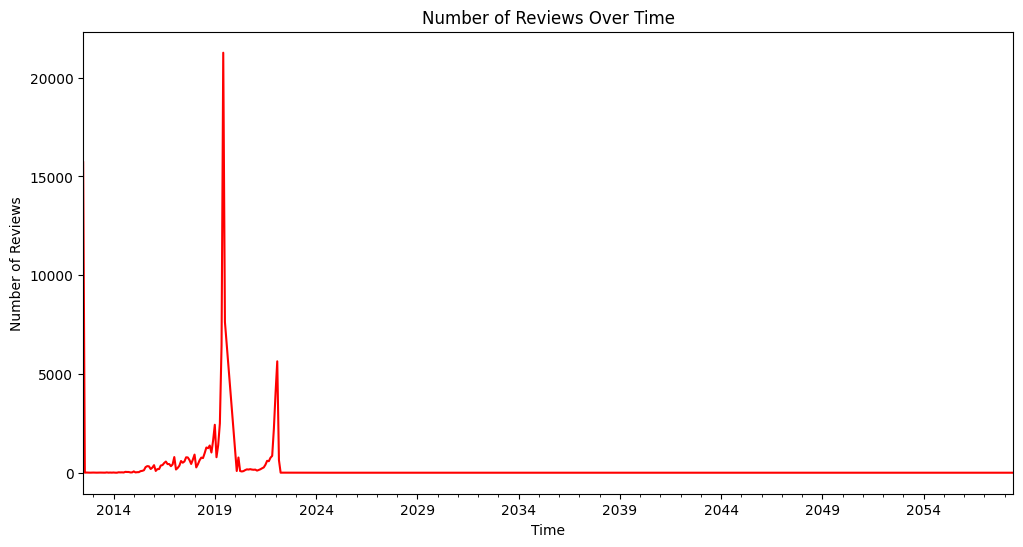

In [33]:
# HOW HAS THE NUMBER OF REVIEWS CHANGE OVER WITH TIME
df["last review"]=pd.to_datetime(df["last review"])
reviews_over_time=df.groupby(df["last review"].dt.to_period("M")).size()
plt.figure(figsize=(12,6))
reviews_over_time.plot(kind="line",color="Red")
plt.title("Number of Reviews Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Reviews")
plt.show()